In [ ]:
!pip install yfinance --quiet
!pip install git+https://github.com/quantopian/pyfolio --quiet
!pip install finance-datareader --quiet

In [2]:
import yfinance as yf # 주가데이터 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfolio as pf
import datetime
import FinanceDataReader as fdr
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# 모듈 구조

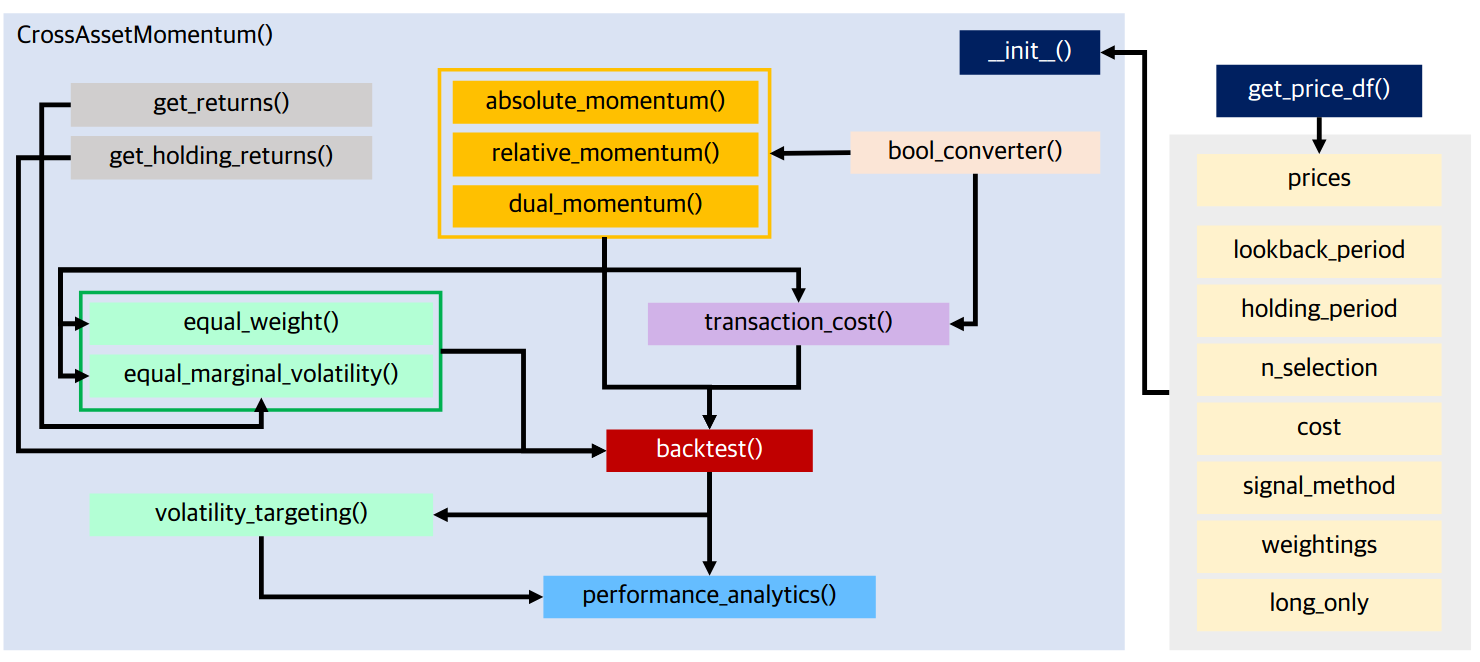

In [20]:
from IPython.display import Image
Image("dualmomentum.png") 

# 데이터 가져오기

In [3]:
stocks = fdr.StockListing('NASDAQ') # 나스닥
stocks = list(stocks['Symbol'])[:100]
stocks

100%|██████████████████████████████████████| 4023/4023 [00:05<00:00, 677.10it/s]


['AAPL',
 'MSFT',
 'AMZN',
 'FB',
 'GOOGL',
 'GOOG',
 'TSLA',
 'NVDA',
 'PYPL',
 'ASML',
 'ADBE',
 'CMCSA',
 'CSCO',
 'NFLX',
 'INTC',
 'PEP',
 'AVGO',
 'COST',
 'AZN',
 'TXN',
 'TMUS',
 'MRNA',
 'QCOM',
 'HON',
 'INTU',
 'CHTR',
 'SBUX',
 'AMD',
 'AMGN',
 'AMAT',
 'SNY',
 'ISRG',
 'ZM',
 'PDD',
 'JD',
 'BNTX',
 'ABNB',
 'LRCX',
 'MU',
 'BKNG',
 'ADP',
 'MELI',
 'GILD',
 'MDLZ',
 'TEAM',
 'ILMN',
 'CME',
 'EQIX',
 'FISV',
 'CSX',
 'ADSK',
 'REGN',
 'ADI',
 'ATVI',
 'IDXX',
 'CRWD',
 'DOCU',
 'NTES',
 'BIDU',
 'WDAY',
 'NXPI',
 'ALGN',
 'KLAC',
 'LULU',
 'ROKU',
 'COIN',
 'VRTX',
 'DXCM',
 'BIIB',
 'MRVL',
 'FTNT',
 'KDP',
 'MNST',
 'TROW',
 'EXC',
 'VOD',
 'MAR',
 'EBAY',
 'KHC',
 'AEP',
 'SNPS',
 'ROST',
 'HOOD',
 'ORLY',
 'CDNS',
 'PAYX',
 'MCHP',
 'DDOG',
 'WBA',
 'CTAS',
 'TTD',
 'MTCH',
 'EA',
 'CTSH',
 'SBAC',
 'XLNX',
 'XEL',
 'LCID',
 'PTON',
 'TSCAP']

In [4]:
def get_price_df(stocks, start_date, end_date = datetime.datetime.today().strftime("%Y-%m-%d")):
    """Returns price dataframe from given URL
    Parameters
    ----------
    url : list
        List which contains ticker
    Returns
    -------
    df : dataframe
        Imported price dataframe of stock list
    """
    # 종가 데이터가 있는 데이터프레임
    df = pd.DataFrame()
    for s in stocks:
      df[s] = yf.download(s, start_date, end_date)['Close']
    return df

In [5]:
prices = get_price_df(stocks, '2016-02-01')
prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,PYPL,ASML,...,TTD,MTCH,EA,CTSH,SBAC,XLNX,XEL,LCID,PTON,TSCAP
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,24.107500,54.709999,574.809998,115.089996,770.770020,752.000000,39.388000,7.325000,37.080002,92.239998,...,NaN,12.790000,64.199997,62.330002,98.139999,49.900002,38.560001,NaN,NaN,NaN
2016-02-02,23.620001,53.000000,552.099976,114.610001,780.909973,764.650024,36.556000,7.015000,36.830002,88.510002,...,NaN,12.190000,60.660000,60.119999,96.410004,48.500000,38.980000,NaN,NaN,NaN
2016-02-03,24.087500,52.160000,531.070007,112.690002,749.380005,726.950012,34.695999,7.050000,37.009998,90.980003,...,NaN,10.660000,59.610001,60.759998,95.779999,48.549999,39.250000,NaN,NaN,NaN
2016-02-04,24.150000,52.000000,536.260010,110.489998,730.030029,708.010010,35.066002,7.052500,37.169998,91.470001,...,NaN,9.760000,58.730000,59.619999,95.900002,49.360001,39.070000,NaN,NaN,NaN
2016-02-05,23.504999,50.160000,502.130005,104.070000,703.760010,683.570007,32.520000,6.607500,35.070000,88.360001,...,NaN,9.300000,55.500000,58.540001,93.400002,48.070000,39.529999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,145.520004,284.820007,3331.479980,351.950012,2697.090088,2719.790039,709.669983,197.500000,270.989990,769.650024,...,83.190002,161.339996,144.110001,73.669998,342.359985,148.979996,68.559998,23.770000,120.690002,26.549999
2021-08-03,147.360001,287.119995,3366.239990,351.239990,2712.600098,2725.600098,709.739990,198.149994,273.500000,779.530029,...,83.160004,158.470001,139.800003,74.900002,346.019989,146.460007,68.699997,23.580000,119.269997,26.340000
2021-08-04,146.949997,286.510010,3354.719971,358.920013,2702.510010,2720.570068,710.919983,202.740005,275.500000,795.479980,...,86.440002,150.570007,139.910004,73.559998,349.070007,144.630005,68.949997,22.629999,120.930000,26.400000


# 듀얼 모멘텀 클래스 정의하기

In [6]:
class CrossAssetMomentum():
    def __init__(self, prices, lookback_period, holding_period, n_selection, cost=0.001, signal_method='dm', weightings='emv', long_only=False, show_analytics=True):   
        self.returns = self.get_returns(prices)
        self.holding_returns = self.get_holding_returns(prices, holding_period)

        if signal_method == 'am':
            self.signal = self.absolute_momentum(prices, lookback_period, long_only)
        elif signal_method == 'rm':
            self.signal = self.relative_momentum(prices, lookback_period, n_selection, long_only)
        elif signal_method == 'dm':
            self.signal = self.dual_momentum(prices, lookback_period, n_selection, long_only)

        if weightings == 'ew':
            self.cs_risk_weight = self.equal_weight(self.signal)
        elif weightings == 'emv':
            self.cs_risk_weight = self.equal_marginal_volatility(self.returns, self.signal)

        self.rebalance_weight = 1 / holding_period
        self.cost = self.transaction_cost(self.signal, cost)

        self.port_rets_wo_cash = self.backtest(self.holding_returns, self.signal, self.cost, self.rebalance_weight, self.cs_risk_weight)
        
        self.ts_risk_weight = self.volatility_targeting(self.port_rets_wo_cash)
        
        self.port_rets = self.port_rets_wo_cash * self.ts_risk_weight
        
        if show_analytics == True:
            self.performance_analytics(self.port_rets)                          
                
    def get_returns(self, prices):
        """Returns the historical daily returns
        
        Paramters
        ---------
        prices : dataframe
            Historical daily prices
            
        Returns
        -------
        returns : dataframe
            Historical daily returns
        """
        returns = prices.pct_change().fillna(0)
        return returns

    def get_holding_returns(self, prices, holding_period):
        """Returns the periodic returns for each holding period
        
        Paramters
        ---------
        returns : dataframe
            Historical daily returns
        holding_period : int
            Holding Period
            
        Returns
        -------
        holding_returns : dataframe
            Periodic returns for each holding period. Pulled by N (holding_period) days forward to keep inline with trading signals.
        """
        holding_returns = prices.pct_change(periods=holding_period).shift(-holding_period).fillna(0)
        return holding_returns

    def absolute_momentum(self, prices, lookback, long_only=False):
        """Returns Absolute Momentum Signals
        
        Parameters
        ----------
        prices : dataframe
            Historical daily prices
        lookback : int
            Lookback window for signal generation
        long_only : bool, optional
            Indicator for long-only momentum, False is default value
        
        Returns
        -------
        returns : dataframe
            Absolute momentum signals     
        """    
        returns = prices.pct_change(periods=lookback).fillna(0)
        long_signal = (returns > 0).applymap(self.bool_converter)
        short_signal = -(returns < 0).applymap(self.bool_converter)
        if long_only == True:
            signal = long_signal
        else:
            signal = long_signal + short_signal
        return signal
    
    def relative_momentum(self, prices, lookback, n_selection, long_only=False):
        """Returns Relative Momentum Signals
        
        Parameters
        ----------
        prices : dataframe
            Historical daily prices
        lookback : int
            Lookback Window for Signal Generation
        n_selection : int
            Number of asset to be traded at one side
        long_only : bool, optional
            Indicator for long-only momentum, False is default value
        
        Returns
        -------
        returns : dataframe
            Relative momentum signals     
        """
        returns = prices.pct_change(periods=lookback).fillna(0)
        rank = returns.rank(axis=1, ascending=False)
        long_signal = (rank <= n_selection).applymap(self.bool_converter)
        short_signal = -(rank >= len(rank.columns) - n_selection + 1).applymap(self.bool_converter)
        if long_only == True:
            signal = long_signal
        else:
            signal = long_signal + short_signal
        return signal
    
    def dual_momentum(self, prices, lookback, n_selection, long_only=False):
        """Returns Dual Momentum Signals
        
        Parameters
        ----------
        prices : dataframe
            Historical daily prices
        lookback : int
            Lookback Window for Signal Generation
        n_selection : int
            Number of asset to be traded at one side
        long_only : bool, optional
            Indicator for long-only momentum, False is default value
        
        Returns
        -------
        returns : dataframe
            Dual momentum signals     
        """
        abs_signal = self.absolute_momentum(prices, lookback, long_only)
        rel_signal = self.relative_momentum(prices, lookback, n_selection, long_only)
        signal = (abs_signal == rel_signal).applymap(self.bool_converter) * abs_signal
        return signal

    def equal_weight(self, signal):
        """Returns Equal Weights
        Parameters
        ----------
        signal : dataframe
            Momentum signal dataframe
        Returns
        -------
        weight : dataframe
            Equal weights for cross-asset momentum portfolio
        """
        total_signal = 1 / abs(signal).sum(axis=1)
        total_signal.replace([np.inf, -np.inf], 0, inplace=True)
        weight = pd.DataFrame(index=signal.index, columns=signal.columns).fillna(value=1)
        weight = weight.mul(total_signal, axis=0)
        return weight

    def equal_marginal_volatility(self, returns, signal):
        """Returns Equal Marginal Volatility (Inverse Volatility)
        
        Parameters
        ----------
        returns : dataframe
            Historical daily returns
        signal : dataframe
            Momentum signal dataframe
        Returns
        -------
        weight : dataframe
            Weights using equal marginal volatility
        """
        vol = (returns.rolling(252).std() * np.sqrt(252)).fillna(0)
        vol_signal = vol * abs(signal)
        inv_vol = 1 / vol_signal
        inv_vol.replace([np.inf, -np.inf], 0, inplace=True)
        weight = inv_vol.div(inv_vol.sum(axis=1), axis=0).fillna(0)
        return weight

    def volatility_targeting(self, returns, target_vol=0.01):
        """Returns Weights based on Vol Target
        
        Parameters
        ----------
        returns : dataframe
            Historical daily returns of backtested portfolio
        target_vol : float, optional
            Target volatility, Default target volatility is 1%
        Returns
        -------
        weights : dataframe
            Weights using equal marginal volatility
        """
        weight = target_vol / (returns.rolling(252).std() * np.sqrt(252)).fillna(0)
        weight.replace([np.inf, -np.inf], 0, inplace=True)
        weight = weight.shift(1).fillna(0)
        return weight

    def transaction_cost(self, signal, cost=0.001):
        """Returns Transaction Costs
        
        Parameters
        ----------
        signal : dataframe
            Momentum signal dataframe
        cost : float, optional
            Transaction cost (%) per each trade. The default is 0.001.
        Returns
        -------
        cost_df : dataframe
            Transaction cost dataframe
        """
        cost_df = (signal.diff() != 0).applymap(self.bool_converter) * cost
        cost_df.iloc[0] = 0
        return cost_df
    
    def backtest(self, returns, signal, cost, rebalance_weight, weighting):
        """Returns Portfolio Returns without Time-Series Risk Weights
        Parameters
        ----------
        returns : dataframe
            Historical daily returns
        signal : dataframe
            Momentum signal dataframe
        cost : dataframe
            Transaction cost dataframe
        rebalance_weight : float
            Rebalance weight
        weighting : dataframe
            Weighting dataframe
        Returns
        -------
        port_rets : dataframe
            Portfolio returns dataframe without applying time-series risk model
        """
        port_rets = ((signal * returns - cost) * rebalance_weight * weighting).sum(axis=1)
        return port_rets

    def performance_analytics(self, returns):
        """Returns Perforamnce Analytics using pyfolio package
        Parameters
        ----------
        returns : series
            backtestd portfolio returns
        Returns
        -------
        None
        """
        pf.create_returns_tear_sheet(returns)

    def bool_converter(self, bool_var):
        """Returns Integer Value from Boolean Value
        Parameters
        ----------
        bool_var : boolean
            Boolean variables representing trade signals
        Returns
        -------
        result : int
            Integer variables representing trade signals
        """
        if bool_var == True:
            result = 1
        elif bool_var == False:
            result = 0
        return result

Start date,2016-02-01
End date,2021-08-06
Total months,66
,Backtest
Annual return,6.002%
Cumulative returns,37.922%
Annual volatility,3.155%
Sharpe ratio,1.86
Calmar ratio,0.67
Stability,0.52
Max drawdown,-9.008%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.01,2018-09-05,2020-04-03,NaT,NaN
1,1.23,2018-05-24,2018-07-09,2018-08-06,53
2,1.10,2017-10-30,2017-12-01,2017-12-21,39
3,1.06,2018-02-22,2018-03-27,2018-05-11,57
4,0.99,2017-05-26,2017-06-09,2017-06-28,24


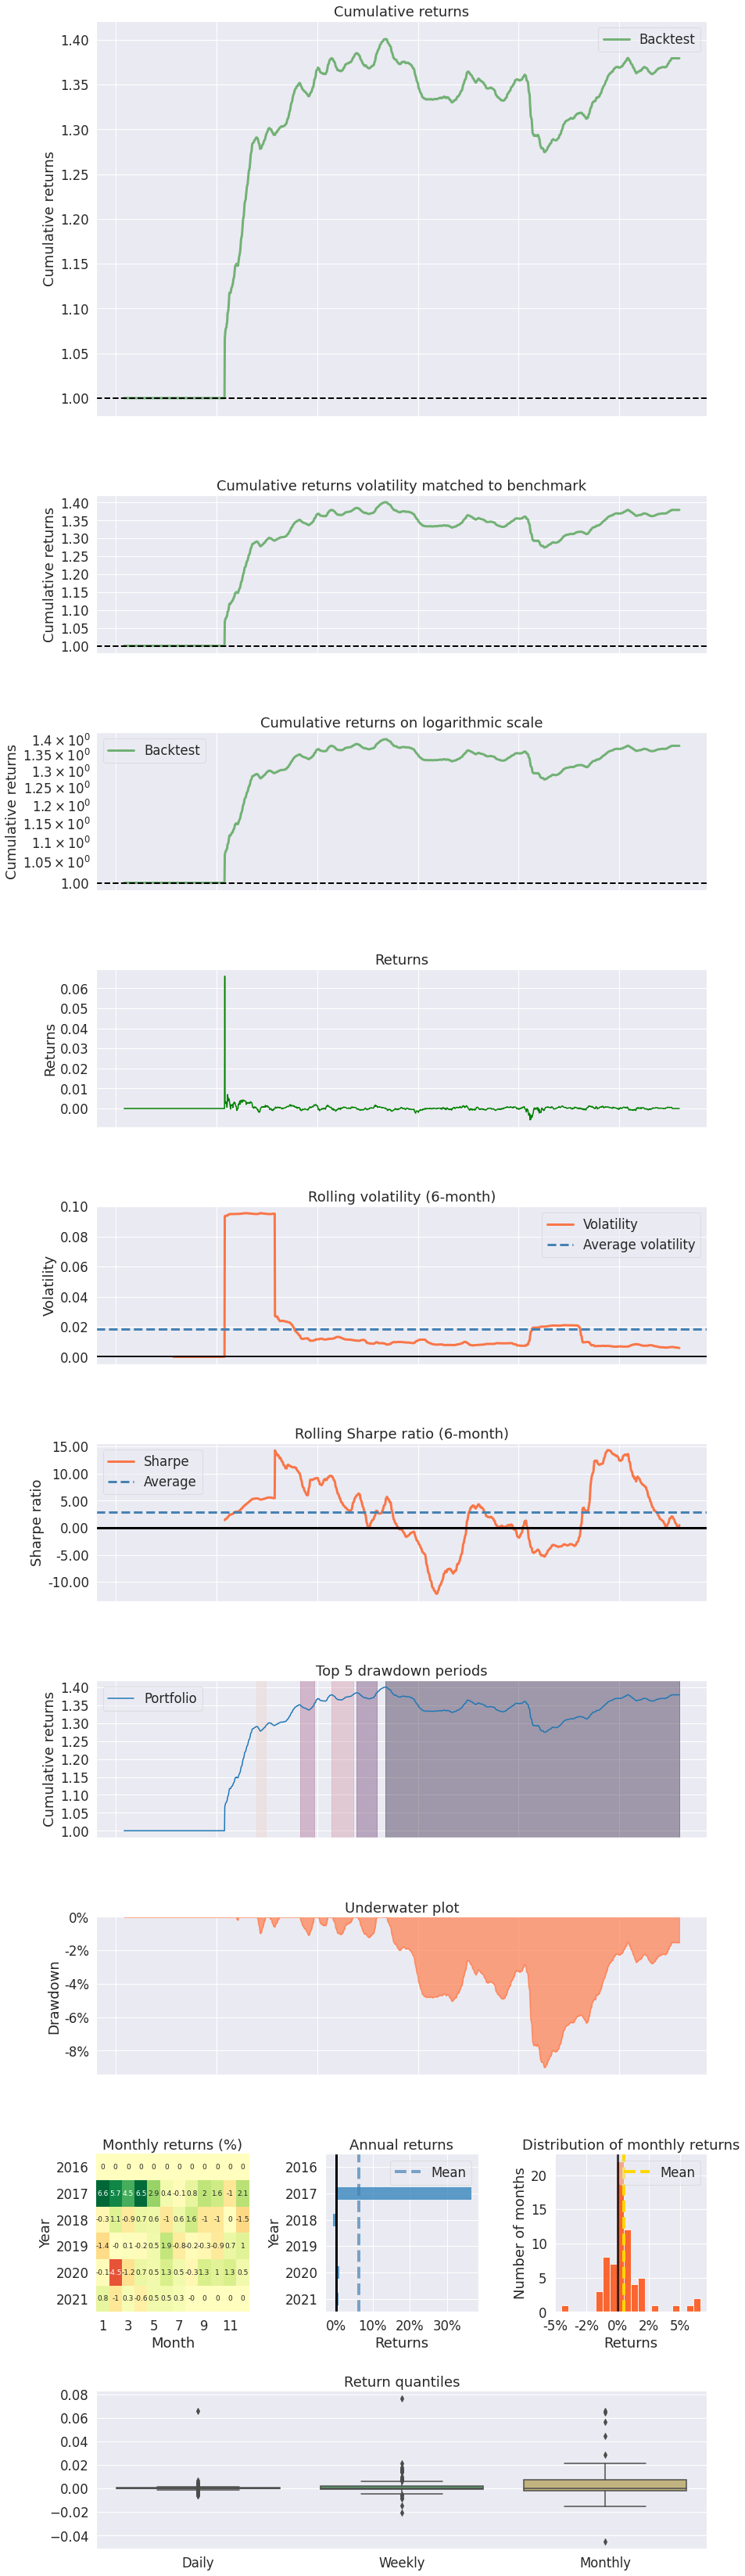

In [7]:
if __name__ == "__main__":
    lookback_period = 120 # 6개월 수익률로 모멘텀 계산
    holding_period = 20 
    n_selection = len(stocks)//2 # 상대모멘텀은 총 갯수의 반을 선택
    momentum = CrossAssetMomentum(prices, lookback_period, holding_period, n_selection)

# 시그널 벡터 출력

In [8]:
momentum.signal

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,PYPL,ASML,...,TTD,MTCH,EA,CTSH,SBAC,XLNX,XEL,LCID,PTON,TSCAP
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,0,1,0,1,1,1,-1,1,-1,1,...,-1,0,-1,-1,1,0,1,-1,-1,0
2021-08-03,0,1,0,1,1,1,-1,1,-1,1,...,-1,-1,-1,-1,1,0,1,-1,-1,0
2021-08-04,0,1,0,1,1,1,-1,1,-1,1,...,-1,-1,-1,-1,1,0,1,-1,-1,0


# 횡적 리스크 가중치 시각화 & 종적 리스크 가중치 시각화

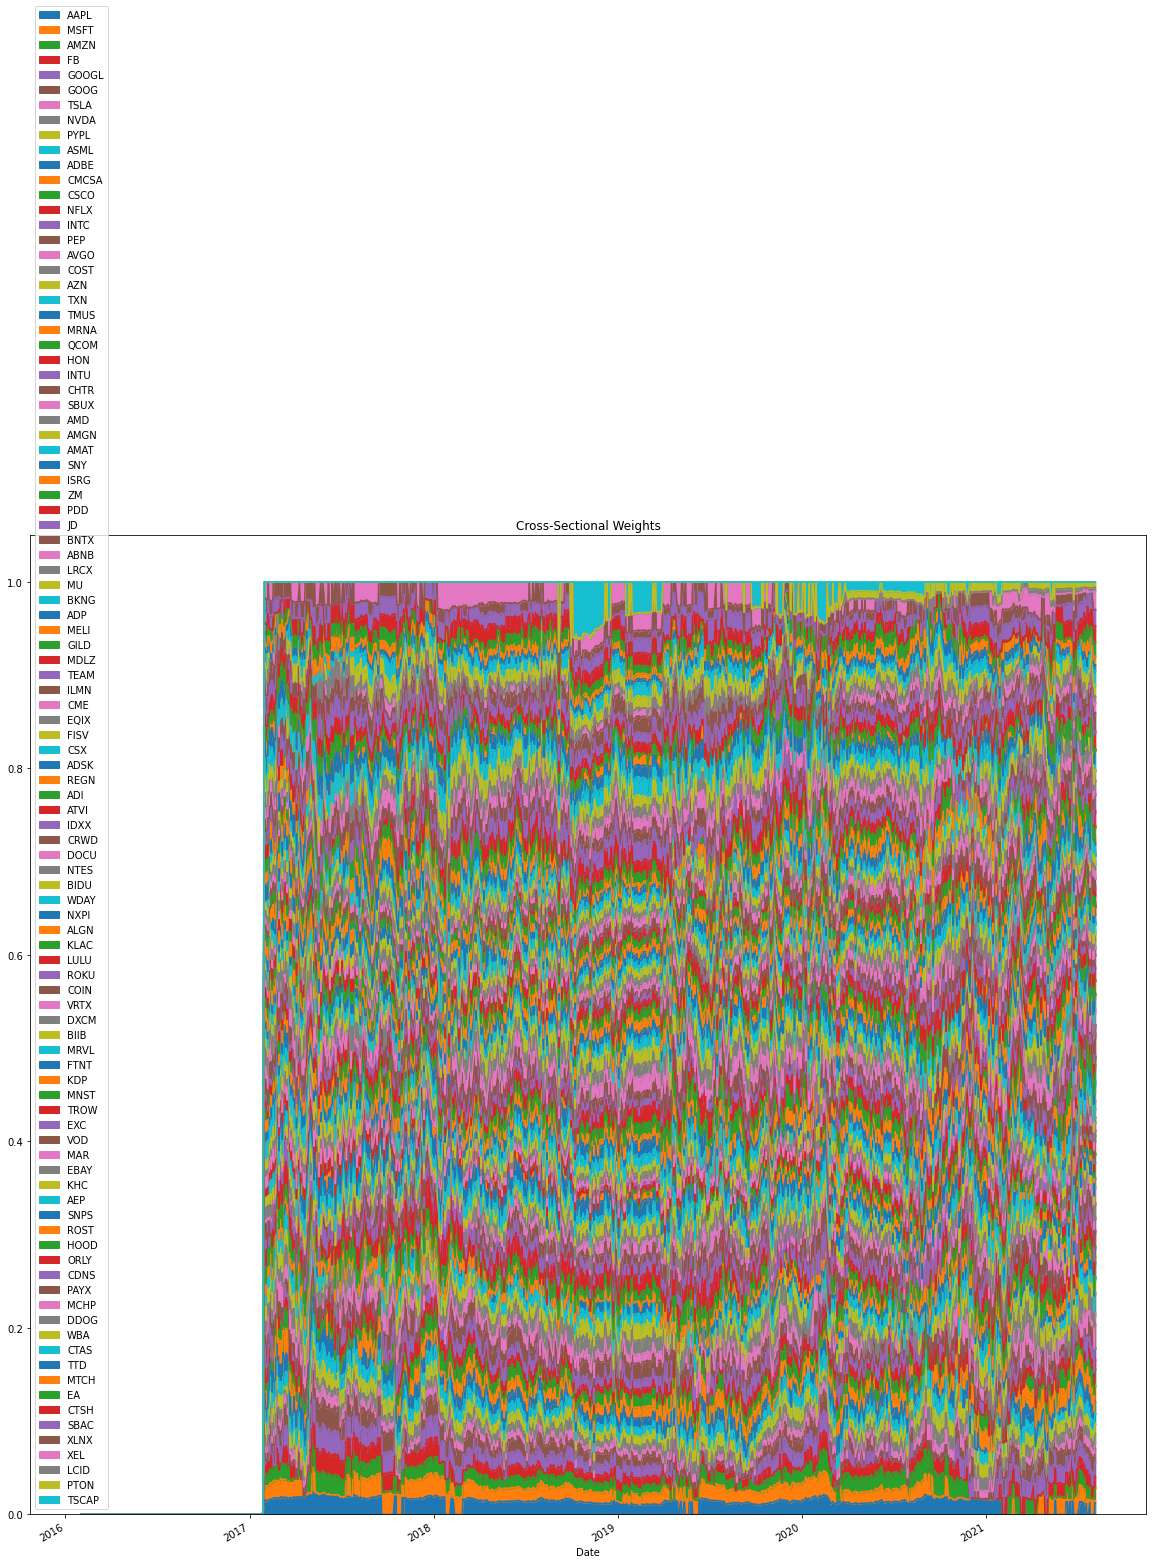

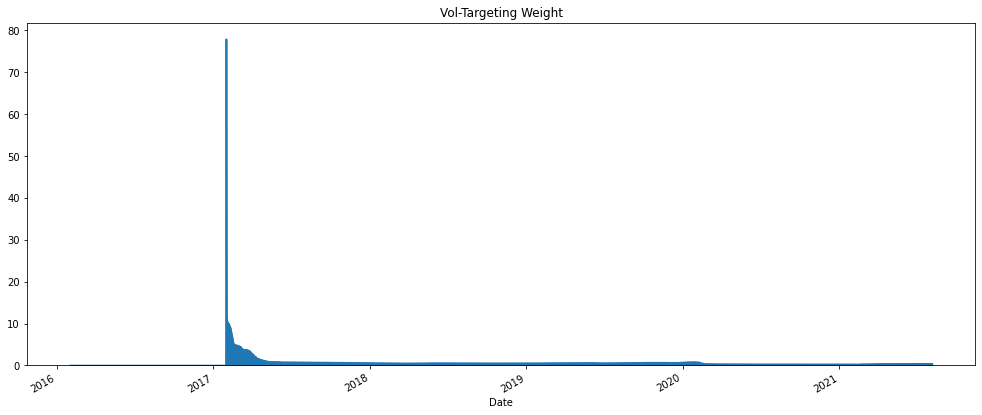

In [9]:
# All asset Portfolio
# Cross-Sectional Weights
momentum.cs_risk_weight.plot.area(figsize=(20,20),title=('Cross-Sectional Weights'))
plt.legend()
plt.show()

# Time-Series Weights
momentum.ts_risk_weight.plot.area(figsize=(17,7),title='Vol-Targeting Weight')
plt.show()

# 십분위 포트폴리오(stocks를 10개 포트폴리오로 나누기)

In [10]:
prices

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,PYPL,ASML,...,TTD,MTCH,EA,CTSH,SBAC,XLNX,XEL,LCID,PTON,TSCAP
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,24.107500,54.709999,574.809998,115.089996,770.770020,752.000000,39.388000,7.325000,37.080002,92.239998,...,NaN,12.790000,64.199997,62.330002,98.139999,49.900002,38.560001,NaN,NaN,NaN
2016-02-02,23.620001,53.000000,552.099976,114.610001,780.909973,764.650024,36.556000,7.015000,36.830002,88.510002,...,NaN,12.190000,60.660000,60.119999,96.410004,48.500000,38.980000,NaN,NaN,NaN
2016-02-03,24.087500,52.160000,531.070007,112.690002,749.380005,726.950012,34.695999,7.050000,37.009998,90.980003,...,NaN,10.660000,59.610001,60.759998,95.779999,48.549999,39.250000,NaN,NaN,NaN
2016-02-04,24.150000,52.000000,536.260010,110.489998,730.030029,708.010010,35.066002,7.052500,37.169998,91.470001,...,NaN,9.760000,58.730000,59.619999,95.900002,49.360001,39.070000,NaN,NaN,NaN
2016-02-05,23.504999,50.160000,502.130005,104.070000,703.760010,683.570007,32.520000,6.607500,35.070000,88.360001,...,NaN,9.300000,55.500000,58.540001,93.400002,48.070000,39.529999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,145.520004,284.820007,3331.479980,351.950012,2697.090088,2719.790039,709.669983,197.500000,270.989990,769.650024,...,83.190002,161.339996,144.110001,73.669998,342.359985,148.979996,68.559998,23.770000,120.690002,26.549999
2021-08-03,147.360001,287.119995,3366.239990,351.239990,2712.600098,2725.600098,709.739990,198.149994,273.500000,779.530029,...,83.160004,158.470001,139.800003,74.900002,346.019989,146.460007,68.699997,23.580000,119.269997,26.340000
2021-08-04,146.949997,286.510010,3354.719971,358.920013,2702.510010,2720.570068,710.919983,202.740005,275.500000,795.479980,...,86.440002,150.570007,139.910004,73.559998,349.070007,144.630005,68.949997,22.629999,120.930000,26.400000


In [11]:
# 총 열의 갯수
stockLen = len(prices.columns)//10
stockLen

10

In [15]:
TenPort = []
for i in range(0,10):
    TenPort.append(prices.iloc[:,stockLen*i:stockLen*(i+1)])

TenPort

[                  AAPL        MSFT         AMZN          FB        GOOGL  \
 Date                                                                       
 2016-02-01   24.107500   54.709999   574.809998  115.089996   770.770020   
 2016-02-02   23.620001   53.000000   552.099976  114.610001   780.909973   
 2016-02-03   24.087500   52.160000   531.070007  112.690002   749.380005   
 2016-02-04   24.150000   52.000000   536.260010  110.489998   730.030029   
 2016-02-05   23.504999   50.160000   502.130005  104.070000   703.760010   
 ...                ...         ...          ...         ...          ...   
 2021-08-02  145.520004  284.820007  3331.479980  351.950012  2697.090088   
 2021-08-03  147.360001  287.119995  3366.239990  351.239990  2712.600098   
 2021-08-04  146.949997  286.510010  3354.719971  358.920013  2702.510010   
 2021-08-05  147.059998  289.519989  3375.989990  362.970001  2725.030029   
 2021-08-06  146.139999  289.459991  3344.939941  363.510010  2714.770020   

In [16]:
TenPort[0] # 첫번째 포트폴리오 보기

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,PYPL,ASML
Date,,,,,,,,,,
2016-02-01,24.107500,54.709999,574.809998,115.089996,770.770020,752.000000,39.388000,7.325000,37.080002,92.239998
2016-02-02,23.620001,53.000000,552.099976,114.610001,780.909973,764.650024,36.556000,7.015000,36.830002,88.510002
2016-02-03,24.087500,52.160000,531.070007,112.690002,749.380005,726.950012,34.695999,7.050000,37.009998,90.980003
2016-02-04,24.150000,52.000000,536.260010,110.489998,730.030029,708.010010,35.066002,7.052500,37.169998,91.470001
2016-02-05,23.504999,50.160000,502.130005,104.070000,703.760010,683.570007,32.520000,6.607500,35.070000,88.360001
...,...,...,...,...,...,...,...,...,...,...
2021-08-02,145.520004,284.820007,3331.479980,351.950012,2697.090088,2719.790039,709.669983,197.500000,270.989990,769.650024
2021-08-03,147.360001,287.119995,3366.239990,351.239990,2712.600098,2725.600098,709.739990,198.149994,273.500000,779.530029
2021-08-04,146.949997,286.510010,3354.719971,358.920013,2702.510010,2720.570068,710.919983,202.740005,275.500000,795.479980


In [17]:
# Implementation of Dual Momentum Strategy for 10 portfolios
momentum_object = []
for i in range(0,10):
    momentum_object.append(CrossAssetMomentum(TenPort[i], lookback_period = 120, holding_period = 20, n_selection = len(TenPort[i].columns)//2,show_analytics=False))

No handles with labels found to put in legend.


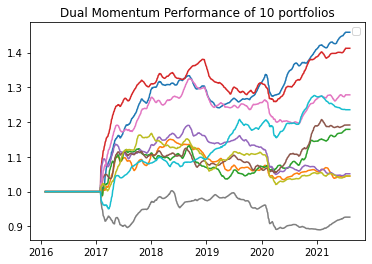

In [18]:
# Cumulative Compounded Returns for 10 portfolios in One Plot
plt.title('Dual Momentum Performance of 10 portfolios')
for i in range(0,10):
    plt.plot((momentum_object[i].port_rets+1).cumprod())
plt.legend()
plt.show()